In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Importing the required packages ##
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the data sets ##
myfile_application = pd.read_csv('/content/drive/MyDrive/Data Visualization/application_data.csv')
myfile_application.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
myfile_prev_application = pd.read_csv('/content/drive/MyDrive/Data Visualization/previous_application.csv')
myfile_prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Checking the size of rows and colums ##
myfile_application.shape

(307511, 122)

In [ ]:
myfile_prev_application.shape

(1670214, 37)

In [ ]:
## Checking the datatypes
myfile_application.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
myfile_prev_application.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [ ]:
## Checking the null values
myfile_application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
myfile_prev_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
def check_missing_values(data):
  total = myfile_application.isnull().sum()
  percent = (data.isnull().sum()/data.isnull().count()*100)
  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by="Percent", ascending=False)

application_data=check_missing_values(myfile_application)
application_data.head(50)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [ ]:
prev_application_data=check_missing_values(myfile_prev_application)
prev_application_data.head(50)

,Total,Percent
RATE_INTEREST_PRIVILEGED,NaN,99.643698
RATE_INTEREST_PRIMARY,NaN,99.643698
RATE_DOWN_PAYMENT,NaN,53.636480
AMT_DOWN_PAYMENT,NaN,53.636480
NAME_TYPE_SUITE,1292.0,49.119754
NFLAG_INSURED_ON_APPROVAL,NaN,40.298129
DAYS_LAST_DUE_1ST_VERSION,NaN,40.298129
DAYS_FIRST_DUE,NaN,40.298129
DAYS_FIRST_DRAWING,NaN,40.298129
DAYS_LAST_DUE,NaN,40.298129


In [ ]:
## Analysing application_data first
## Dropping columns with High Missing Values
final_cols=list(application_data[(application_data.Percent<60)].index)
myfile_application=myfile_application[final_cols]
myfile_application.describe()

,LANDAREA_MEDI,LANDAREA_MODE,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,124921.000000,124921.000000,124921.000000,127568.000000,127568.000000,127568.000000,134133.000000,137829.000000,137829.000000,137829.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.067169,0.064958,0.066333,0.087955,0.088442,0.087543,0.502130,0.027022,0.028358,0.028236,...,0.998133,0.199368,0.819889,0.999997,-2994.202373,-4986.120328,63815.045904,-16036.995067,0.020868,278180.518577
std,0.082167,0.081750,0.081184,0.082179,0.082438,0.084307,0.211062,0.070254,0.069523,0.070166,...,0.043164,0.399526,0.384280,0.001803,1509.450419,3522.886321,141275.766519,4363.988632,0.013831,102790.175348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7197.000000,-24672.000000,-17912.000000,-25229.000000,0.000290,100002.000000
25%,0.018700,0.016600,0.018700,0.043700,0.044200,0.040700,0.334007,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,-4299.000000,-7479.500000,-2760.000000,-19682.000000,0.010006,189145.500000
50%,0.048700,0.045800,0.048100,0.075800,0.076300,0.074600,0.505998,0.001100,0.003600,0.003100,...,1.000000,0.000000,1.000000,1.000000,-3254.000000,-4504.000000,-1213.000000,-15750.000000,0.018850,278202.000000
75%,0.086800,0.084100,0.085600,0.111600,0.112200,0.112400,0.675053,0.023100,0.027700,0.026600,...,1.000000,0.000000,1.000000,1.000000,-1720.000000,-2010.000000,-289.000000,-12413.000000,0.028663,367142.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962693,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,365243.000000,-7489.000000,0.072508,456255.000000


In [ ]:
## Checking columns with very less missing values
low_missing=pd.DataFrame(application_data[(application_data.Percent>0)&(application_data.Percent<15)])
low_missing

,Total,Percent
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021


In [ ]:
# We can impute missing values in these columns above with 0s
# Before that we'll check all the columns names for different data types
myfile_application.dtypes

LANDAREA_MEDI          float64
LANDAREA_MODE          float64
LANDAREA_AVG           float64
BASEMENTAREA_MEDI      float64
BASEMENTAREA_AVG       float64
                        ...   
NAME_HOUSING_TYPE       object
NAME_FAMILY_STATUS      object
NAME_EDUCATION_TYPE     object
NAME_INCOME_TYPE        object
SK_ID_CURR               int64
Length: 105, dtype: object

In [ ]:
myfile_application.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [ ]:
myfile_application.select_dtypes('float64').columns

Index(['LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'APARTMENTS_MEDI',
       'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
       'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
    

In [ ]:
myfile_application.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

In [ ]:
# We will check unique values for Univariate Analysis, Bivariate and Multivariate Analysis
myfile_application.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

WALLSMATERIAL_MODE             7
HOUSETYPE_MODE                 3
EMERGENCYSTATE_MODE            2
OCCUPATION_TYPE               18
NAME_TYPE_SUITE                7
NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
NAME_INCOME_TYPE               8
dtype: int64

In [ ]:
myfile_application.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

LANDAREA_MEDI                     3560
LANDAREA_MODE                     3563
LANDAREA_AVG                      3527
BASEMENTAREA_MEDI                 3772
BASEMENTAREA_AVG                  3780
BASEMENTAREA_MODE                 3841
EXT_SOURCE_1                    114584
NONLIVINGAREA_MODE                3327
NONLIVINGAREA_AVG                 3290
NONLIVINGAREA_MEDI                3323
ELEVATORS_MEDI                      46
ELEVATORS_AVG                      257
ELEVATORS_MODE                      26
APARTMENTS_MEDI                   1148
APARTMENTS_AVG                    2339
APARTMENTS_MODE                    760
ENTRANCES_MEDI                      46
ENTRANCES_AVG                      285
ENTRANCES_MODE                      30
LIVINGAREA_AVG                    5199
LIVINGAREA_MODE                   5301
LIVINGAREA_MEDI                   5281
FLOORSMAX_MODE                      25
FLOORSMAX_MEDI                      49
FLOORSMAX_AVG                      403
YEARS_BEGINEXPLUATATION_M

In [ ]:
myfile_application.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

In [ ]:
## We can see that Target columns has the targeted audience who had late payement vs others
late_pay_audience=myfile_application[myfile_application.TARGET==1]
other_audience=myfile_application[myfile_application.TARGET==0]

late_pay_audience.count()

LANDAREA_MEDI           8721
LANDAREA_MODE           8721
LANDAREA_AVG            8721
BASEMENTAREA_MEDI       8787
BASEMENTAREA_AVG        8787
                       ...  
NAME_HOUSING_TYPE      24825
NAME_FAMILY_STATUS     24825
NAME_EDUCATION_TYPE    24825
NAME_INCOME_TYPE       24825
SK_ID_CURR             24825
Length: 105, dtype: int64

In [ ]:
other_audience.count()

LANDAREA_MEDI          116200
LANDAREA_MODE          116200
LANDAREA_AVG           116200
BASEMENTAREA_MEDI      118781
BASEMENTAREA_AVG       118781
                        ...  
NAME_HOUSING_TYPE      282686
NAME_FAMILY_STATUS     282686
NAME_EDUCATION_TYPE    282686
NAME_INCOME_TYPE       282686
SK_ID_CURR             282686
Length: 105, dtype: int64

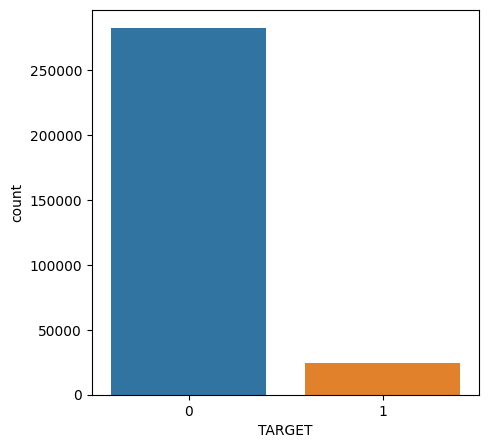

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=myfile_application['TARGET'], data=myfile_application)
plt.show()

In [ ]:
# We can notice that other audience is higher than late payment audience

In [ ]:
## Checking categorical columns of Object data type for Univariate Analysis
myfile_application.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [ ]:
def plot_graph(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,10))

    s1=sns.countplot(ax=ax1,x=late_pay_audience[var], data=late_pay_audience, order= late_pay_audience[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Tageted Audience', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=other_audience[var], data=other_audience, order= other_audience[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Tageted Audience', fontsize=10)
    plt.show()

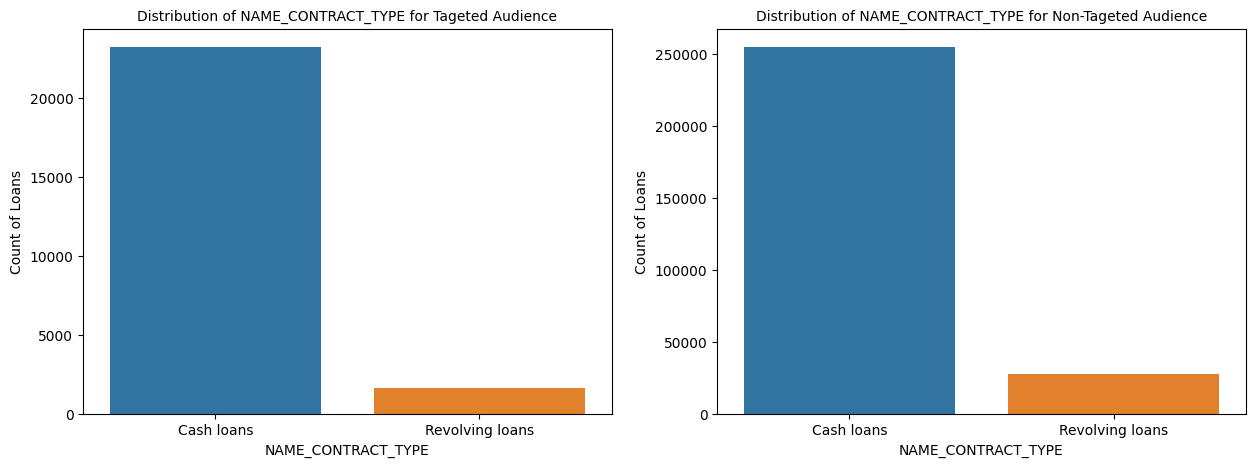

In [ ]:
plot_graph('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

In [ ]:
## We observe that the number of Cash loans is much higher than the number of Revolving loans for both Target = 0 and Target = 1

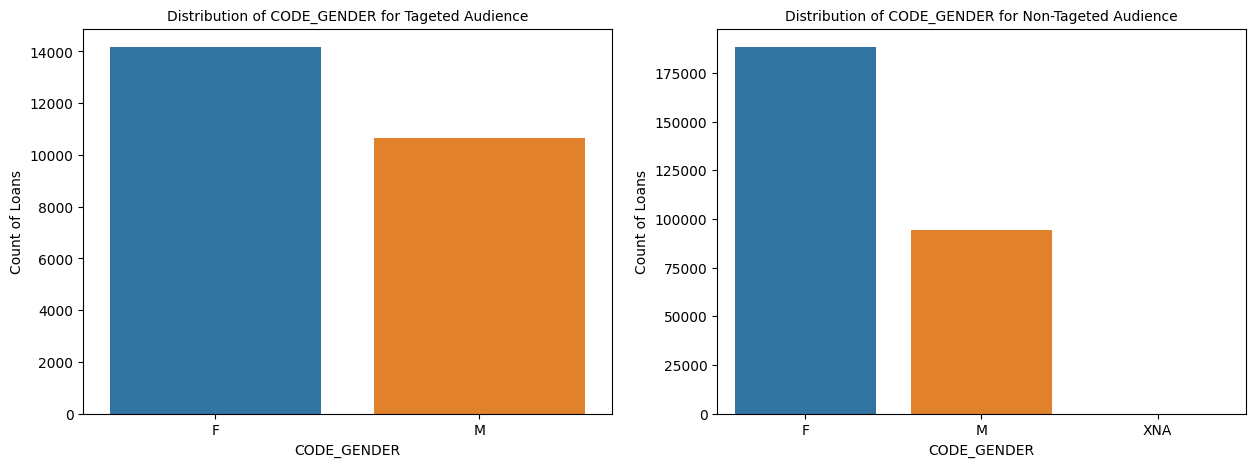

In [ ]:
plot_graph('CODE_GENDER', label_rotation=False,horizontal_layout=True)

In [ ]:
## We observe that the number of Females taking loans is much higher than the number of Males for both Target = 0 and Target = 1

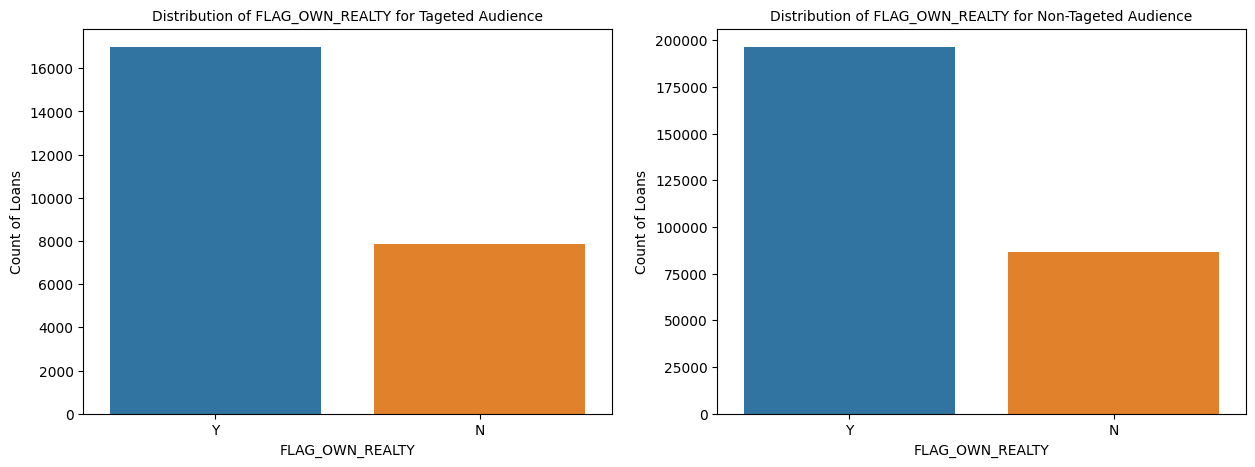

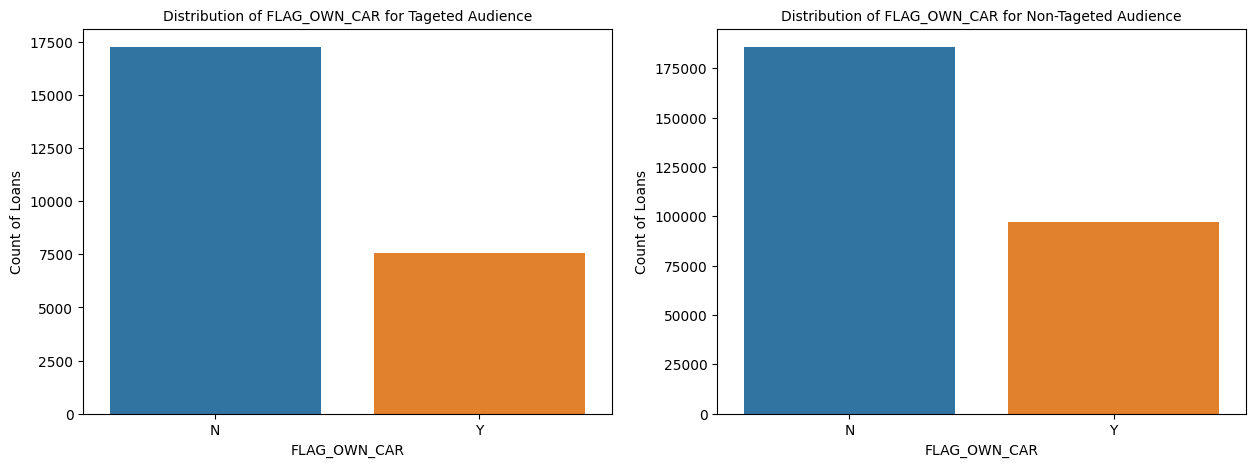

In [ ]:
plot_graph('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_graph('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

In [ ]:
## We observed that the number of most people applying for loan do not own a car.
## Also, observed that the ratio of people who own a car is higher for non-targeted audience

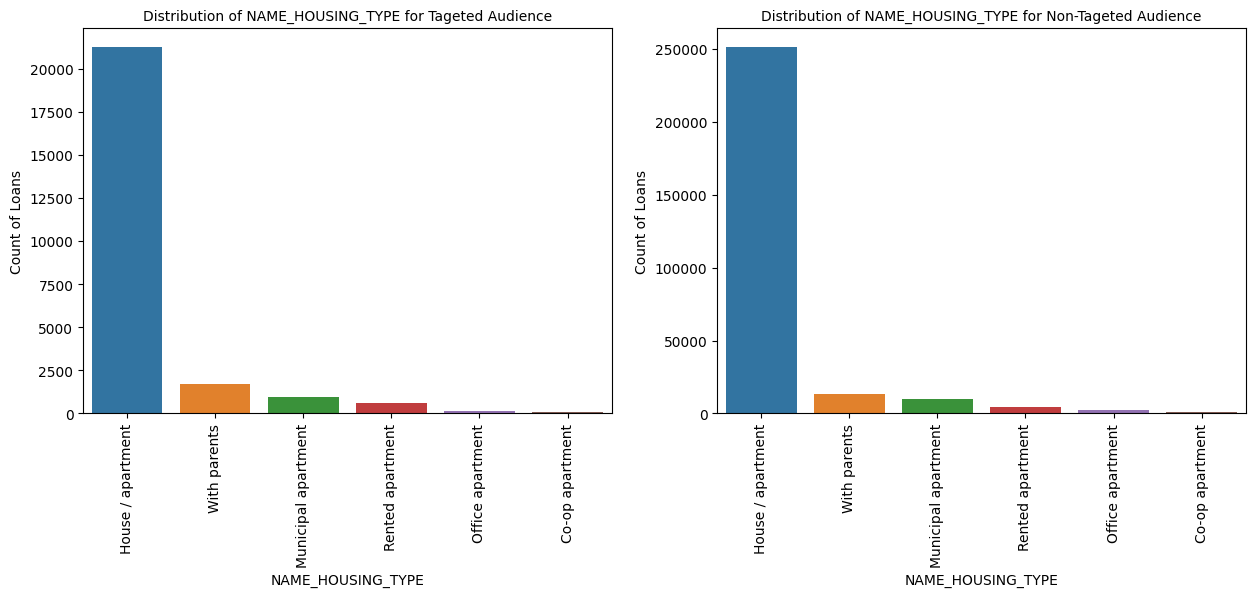

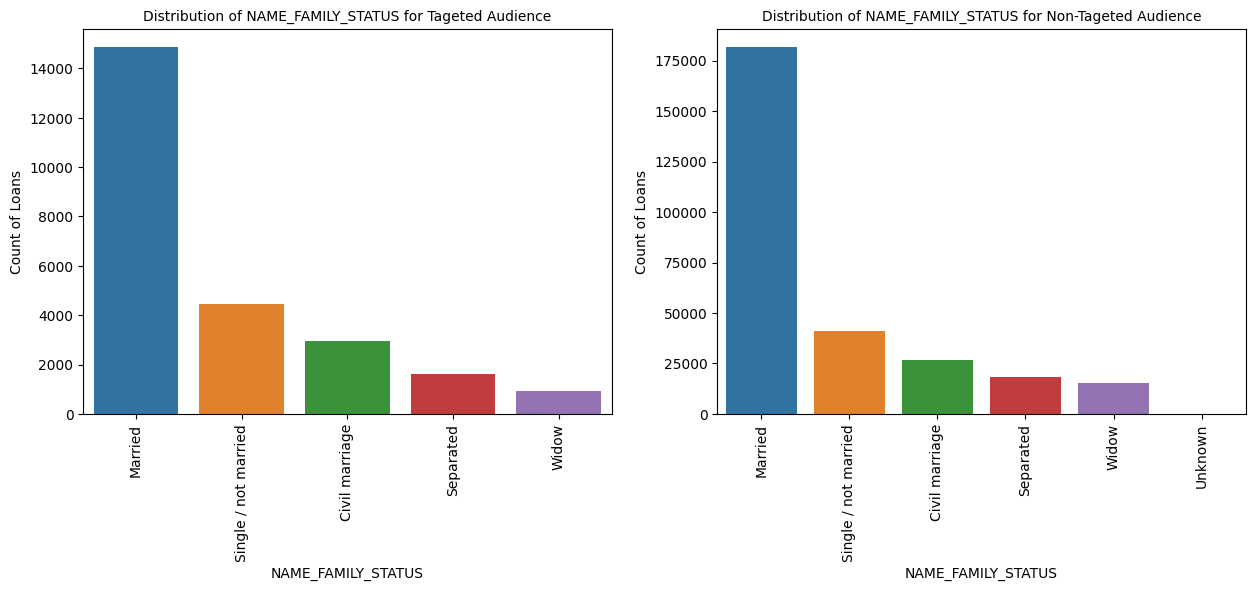

In [ ]:
plot_graph('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)
plot_graph('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

In [ ]:
## Here, we observed that people who live With Parents is more for targeted than non-targeted audience.
## It tells us that applicant who live with parents have a higher chance of having payment difficulties.

## Also, Single/Unmarried people is more for targeted than non-targeted audience.
## It tells us that Single/Unmarried people are more likely to have payment difficulties.

In [ ]:
## Checking numerical columns of float64, int64 data type for Bivariate and Multivariate Analysis

In [6]:
late_pay_audience=myfile_application[myfile_application.TARGET==1]
other_audience=myfile_application[myfile_application.TARGET==0]
def plot_boxplot(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=late_pay_audience[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Targeted audience', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
plt.show()

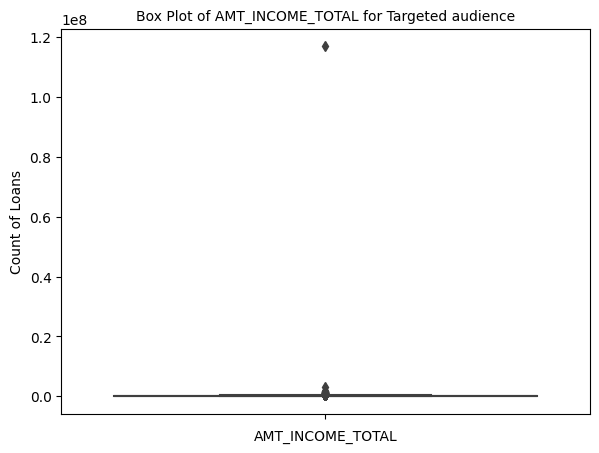

In [ ]:
plot_boxplot('AMT_INCOME_TOTAL')

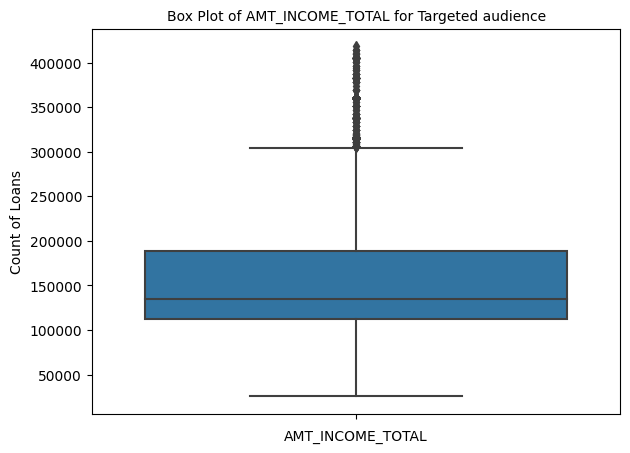

In [ ]:
## we can see the outlier here at AMT_INCOME_TOTAL
myfile_application=myfile_application[myfile_application.AMT_INCOME_TOTAL<np.nanpercentile(myfile_application['AMT_INCOME_TOTAL'], 99)]

#update dataframes
late_pay_audience=myfile_application[myfile_application.TARGET==1]
other_audience=myfile_application[myfile_application.TARGET==0]

plot_boxplot('AMT_INCOME_TOTAL')

In [ ]:
## Boxplot tell us that most people with payment have incomes in the lower range between 100000 to 200000 which some on the higher end some on the lower

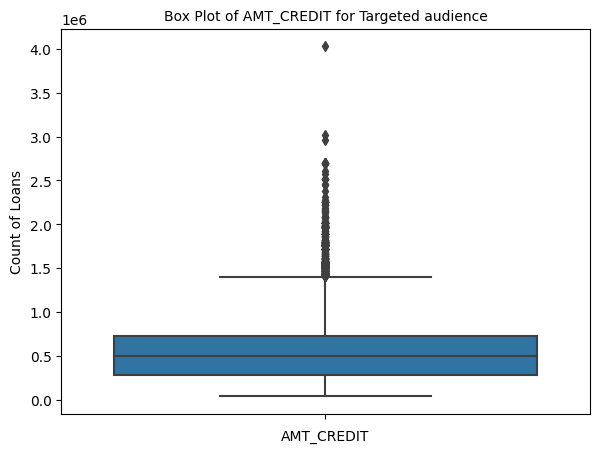

In [7]:
plot_boxplot('AMT_CREDIT')

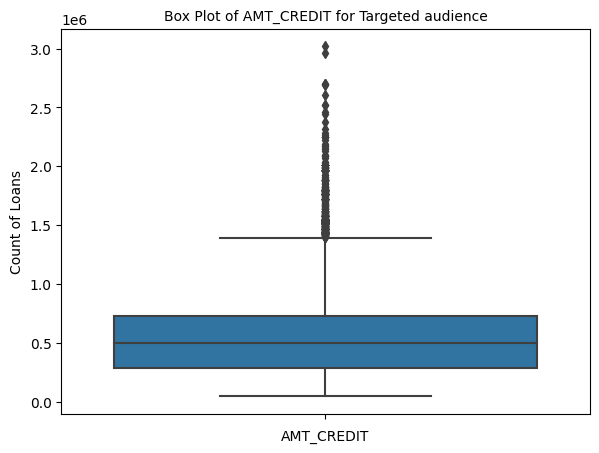

In [ ]:
## we can see the outlier here at AMT_CREDIT
myfile_application=myfile_application[myfile_application.AMT_INCOME_TOTAL<np.nanpercentile(myfile_application['AMT_CREDIT'], 99)]

#update dataframes
late_pay_audience=myfile_application[myfile_application.TARGET==1]
other_audience=myfile_application[myfile_application.TARGET==0]

plot_boxplot('AMT_CREDIT')

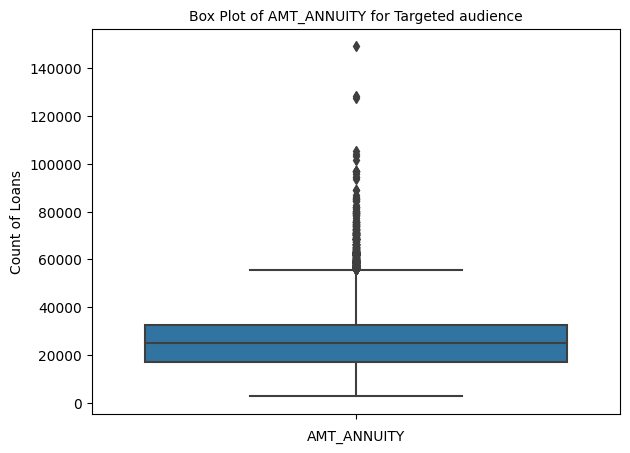

In [ ]:
plot_boxplot('AMT_ANNUITY')

In [ ]:
myfile_application['AMT_INCOME_TOTAL'].describe()

count        5.000000
mean     25920.000000
std        246.475151
min      25650.000000
25%      25650.000000
50%      26100.000000
75%      26100.000000
max      26100.000000
Name: AMT_INCOME_TOTAL, dtype: float64

MEMORY - Varaible in python

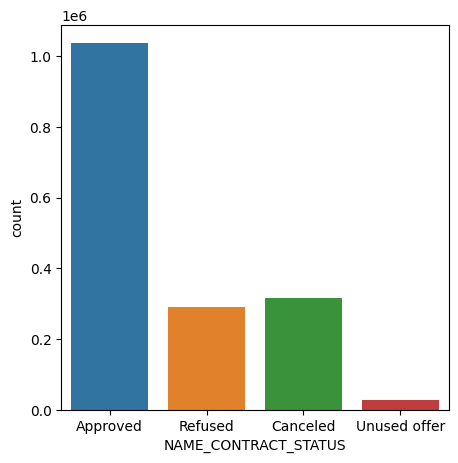

In [ ]:
## Analysis of Previous Application Dataset
plt.figure(figsize=(5,5))
sns.countplot(x=myfile_prev_application['NAME_CONTRACT_STATUS'], data=myfile_prev_application)
plt.show()

In [ ]:
def check_missing_values2(data):
  total = myfile_prev_application.isnull().sum()
  percent = (data.isnull().sum()/data.isnull().count()*100)
  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by="Percent", ascending=False)

application_prev_data=check_missing_values2(myfile_prev_application)
application_prev_data.head(50)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
AMT_DOWN_PAYMENT,895844,53.636480
RATE_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_TERMINATION,673065,40.298129
DAYS_LAST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129


In [ ]:
#dropping columns with more than 50% missing values
cols_to_keep=list(application_prev_data[(application_prev_data.Percent<50)].index)
previous_data=myfile_prev_application[cols_to_keep]
previous_data.describe()

,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,SELLERPLACE_AREA,SK_ID_PREV,SK_ID_CURR,DAYS_DECISION,NFLAG_LAST_APPL_IN_DAY,HOUR_APPR_PROCESS_START,AMT_APPLICATION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,0.332570,81992.343838,76582.403064,33767.774054,13826.269337,342209.855039,2.278473e+05,1.595512e+04,1.605408e+01,1.961140e+05,3.139511e+02,1.923089e+06,2.783572e+05,-8.806797e+02,9.964675e-01,1.248418e+01,1.752339e+05
std,0.471134,153303.516729,149647.415123,106857.034789,72444.869708,88916.115833,3.153966e+05,1.478214e+04,1.456729e+01,3.185746e+05,7.127443e+03,5.325980e+05,1.028148e+05,7.790997e+02,5.932963e-02,3.334028e+00,2.927798e+05
min,0.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,-2922.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000001e+06,1.000010e+05,-2.922000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000,365243.000000,5.084100e+04,6.321780e+03,6.000000e+00,2.416050e+04,-1.000000e+00,1.461857e+06,1.893290e+05,-1.300000e+03,1.000000e+00,1.000000e+01,1.872000e+04
50%,0.000000,-499.000000,-537.000000,-361.000000,-831.000000,365243.000000,1.123200e+05,1.125000e+04,1.200000e+01,8.054100e+04,3.000000e+00,1.923110e+06,2.787145e+05,-5.810000e+02,1.000000e+00,1.200000e+01,7.104600e+04
75%,1.000000,-44.000000,-74.000000,129.000000,-411.000000,365243.000000,2.340000e+05,2.065842e+04,2.400000e+01,2.164185e+05,8.200000e+01,2.384280e+06,3.675140e+05,-2.800000e+02,1.000000e+00,1.500000e+01,1.803600e+05
max,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,6.905160e+06,4.180581e+05,8.400000e+01,6.905160e+06,4.000000e+06,2.845382e+06,4.562550e+05,-1.000000e+00,1.000000e+00,2.300000e+01,6.905160e+06


In [ ]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(application_prev_data[(application_prev_data.Percent>0)&(application_prev_data.Percent<15)])
low_missing

,Total,Percent
PRODUCT_COMBINATION,346,0.020716
AMT_CREDIT,1,0.000060


In [10]:
approved=myfile_prev_application[myfile_prev_application.NAME_CONTRACT_STATUS=='Approved']
refused=myfile_prev_application[myfile_prev_application.NAME_CONTRACT_STATUS=='Refused']
canceled=myfile_prev_application[myfile_prev_application.NAME_CONTRACT_STATUS=='Canceled']
unused=myfile_prev_application[myfile_prev_application.NAME_CONTRACT_STATUS=='Unused Offer']

In [8]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))

    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)


    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

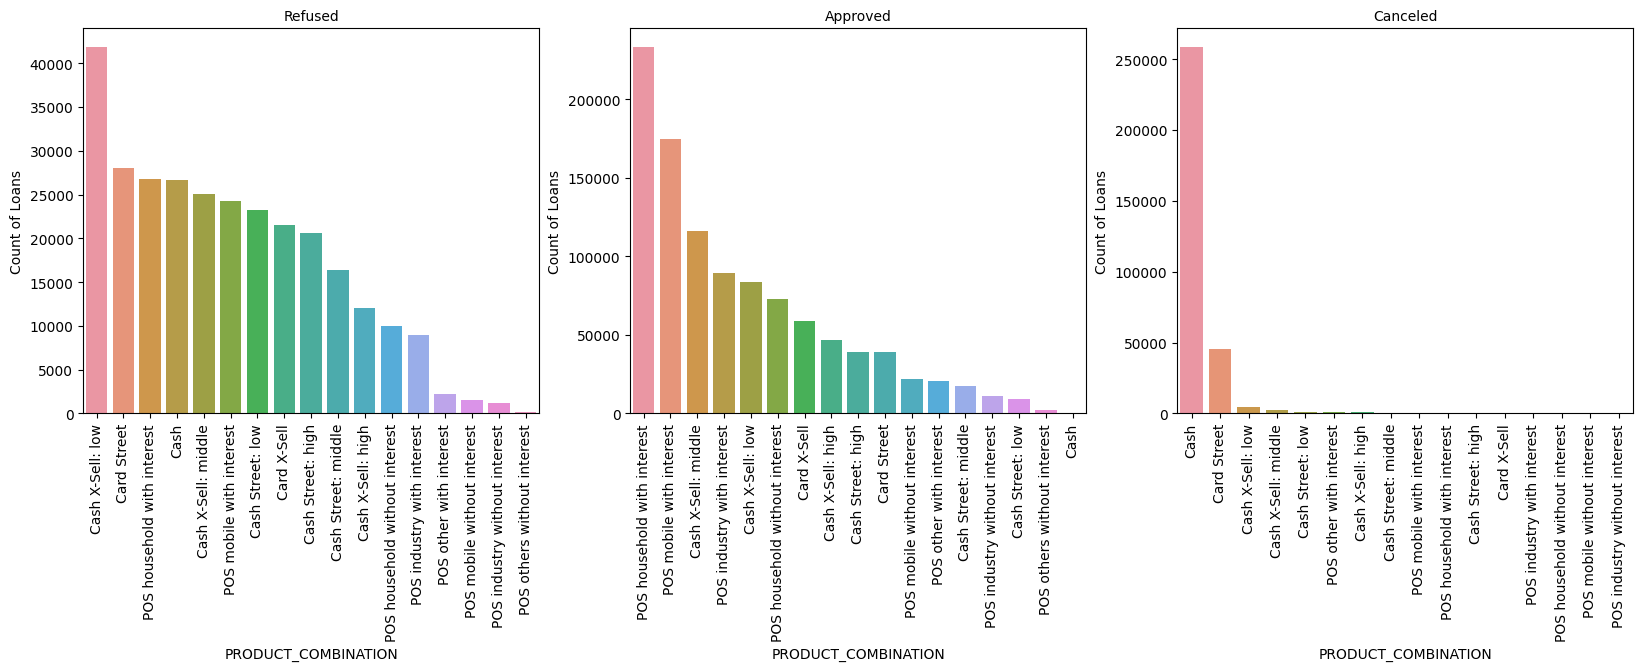

In [11]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

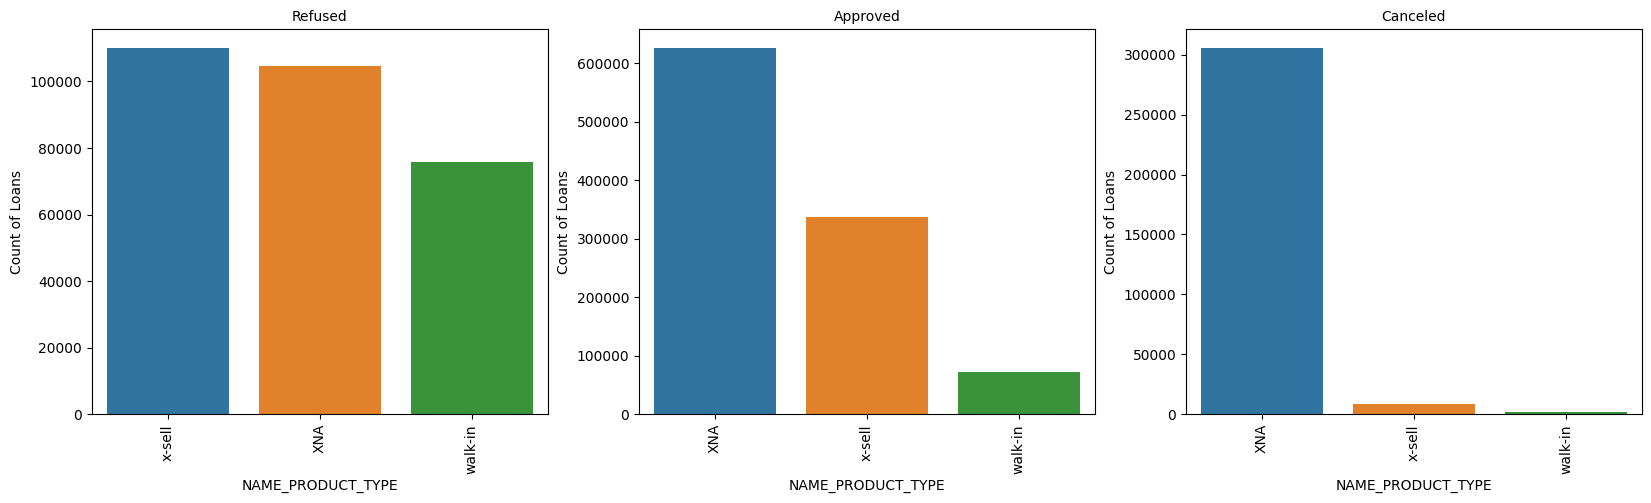

In [ ]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

Data Types

In [ ]:
## Checking categorical columns of Object data type for Univariate Analysis
myfile_prev_application.select_dtypes('object').columns


Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

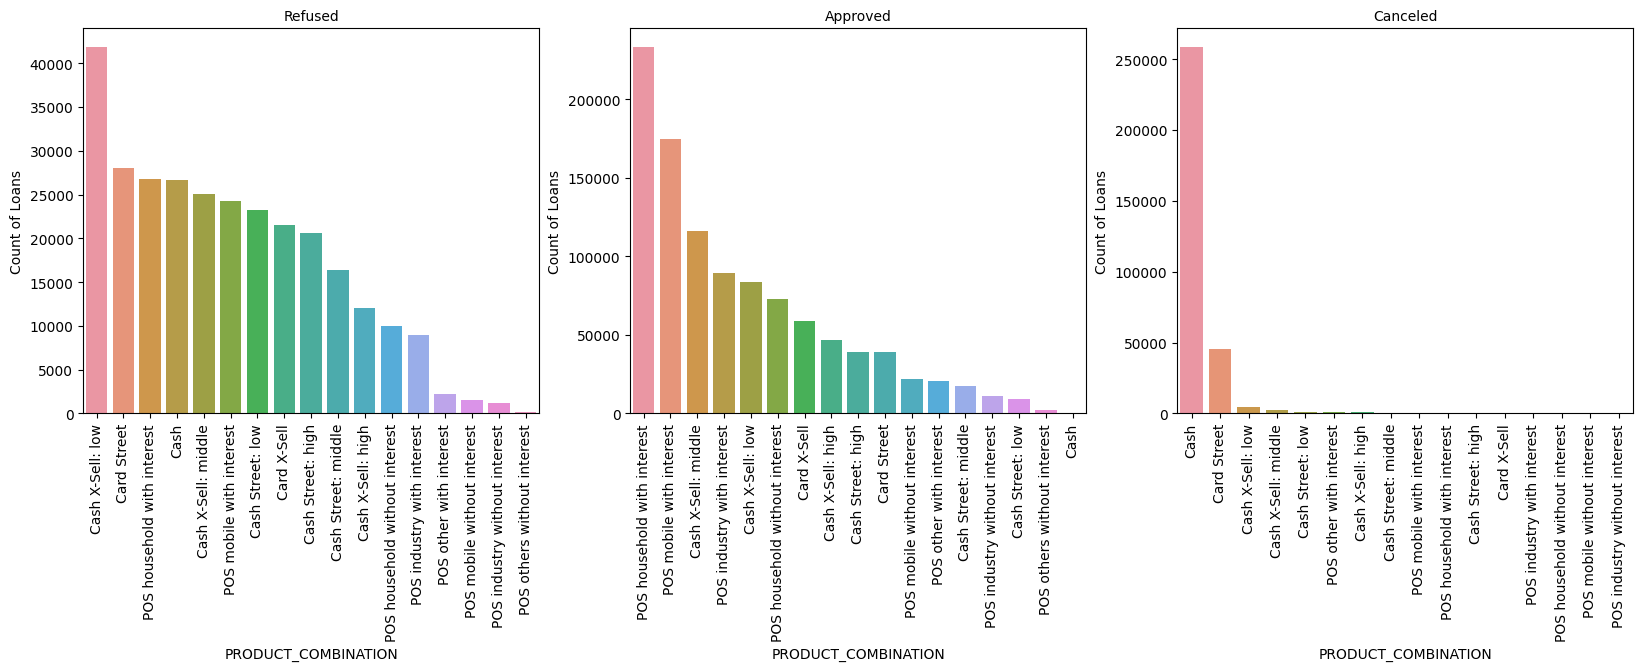

In [ ]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

In [ ]:
## We observe most number of loans were approved for POS household with interest.
## Most number of refused loans were of Cash X-Sell: Low Product combination
## Most Canceled loans were Cash loans

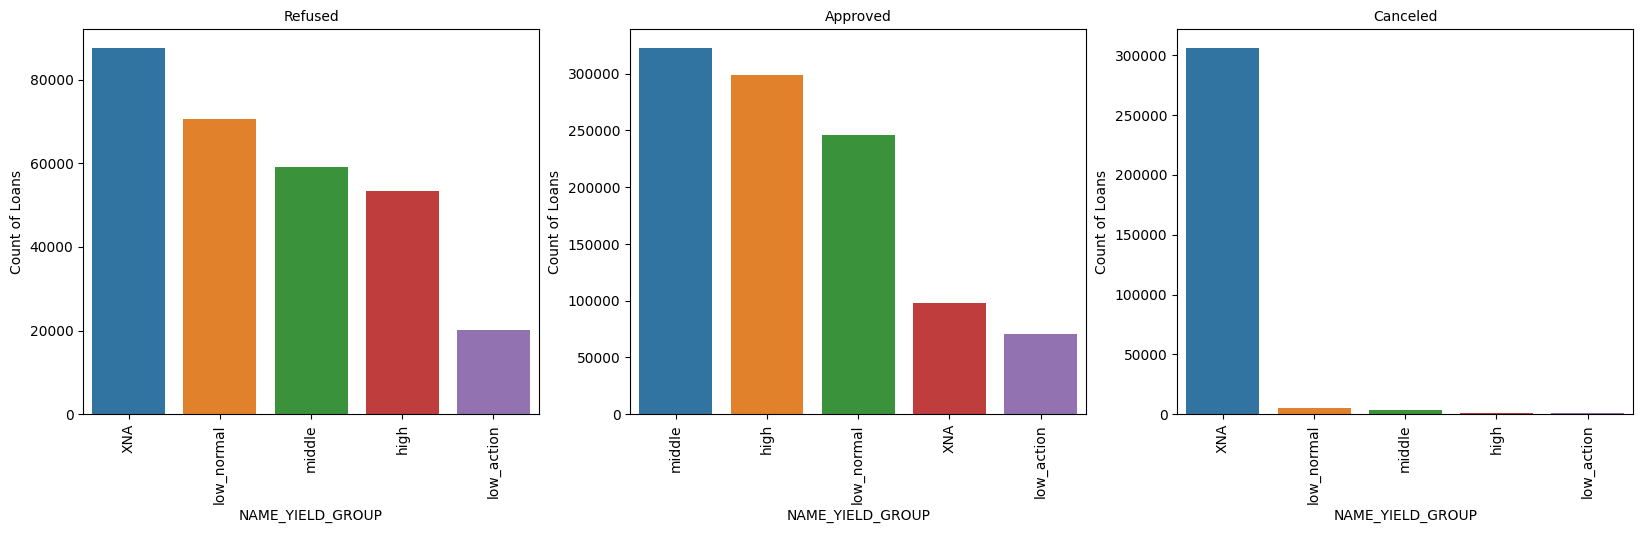

In [ ]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

In [ ]:
## Most approved loans were from Middle Yield Goup
## Most refused loans were from Yield Goups Not specified

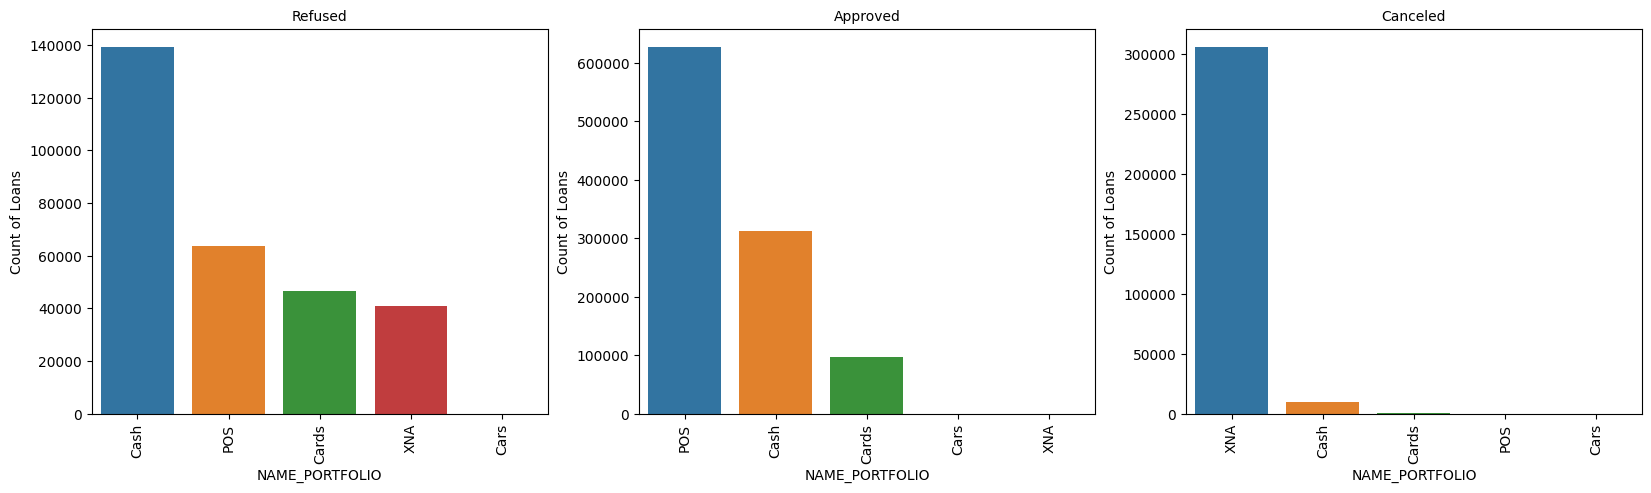

In [ ]:
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

In [ ]:
## Most approved loans were POS
## Most refused loans were Cash

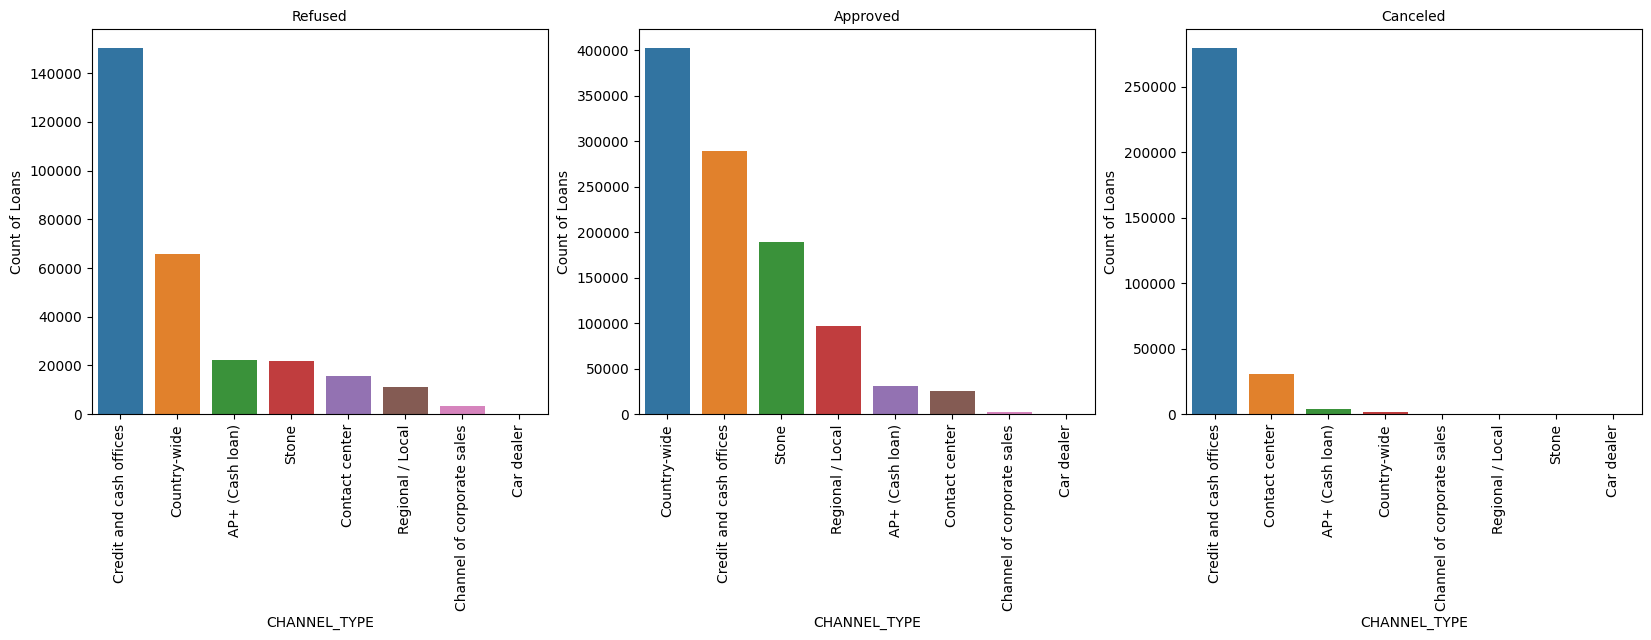

In [ ]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

In [ ]:
## Most approved loans were from Country-wide Channel
## Most refused loans were from Credit and Cash Offices Channel

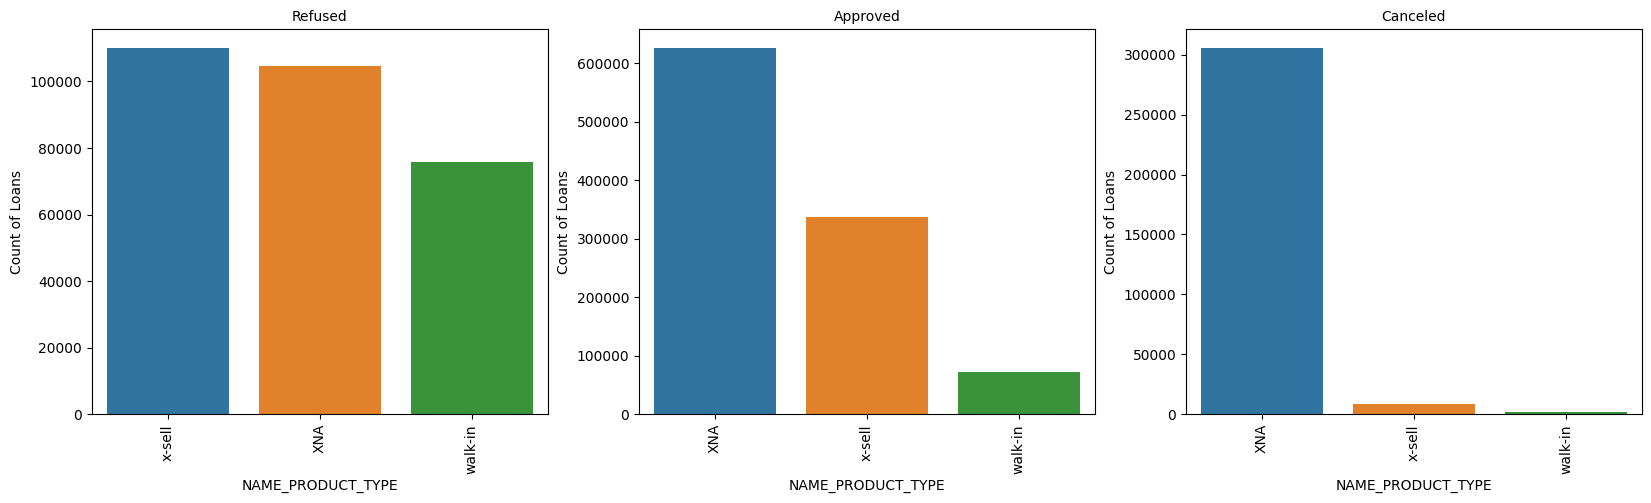

In [ ]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

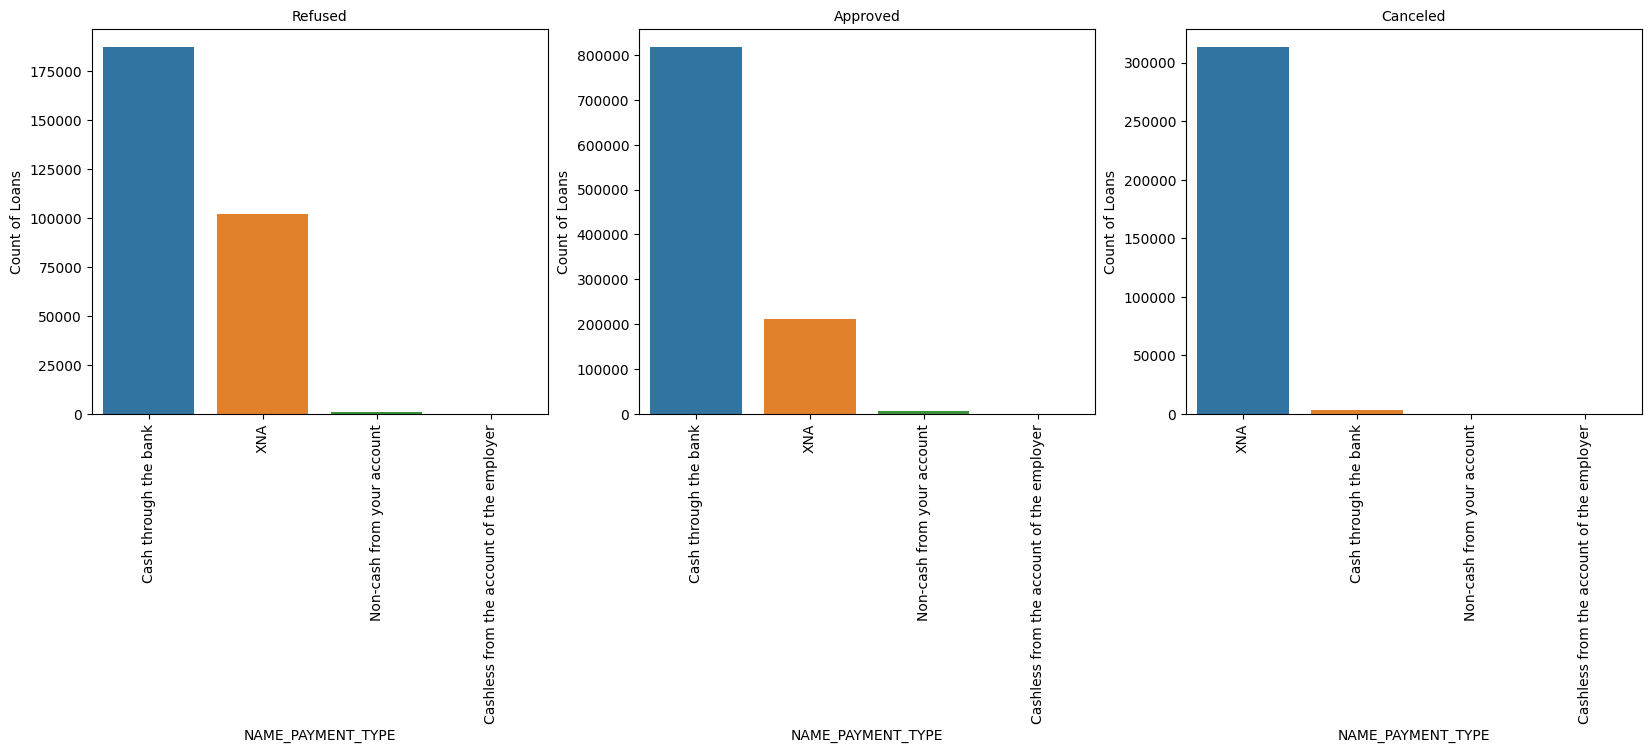

In [ ]:
plot_3charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

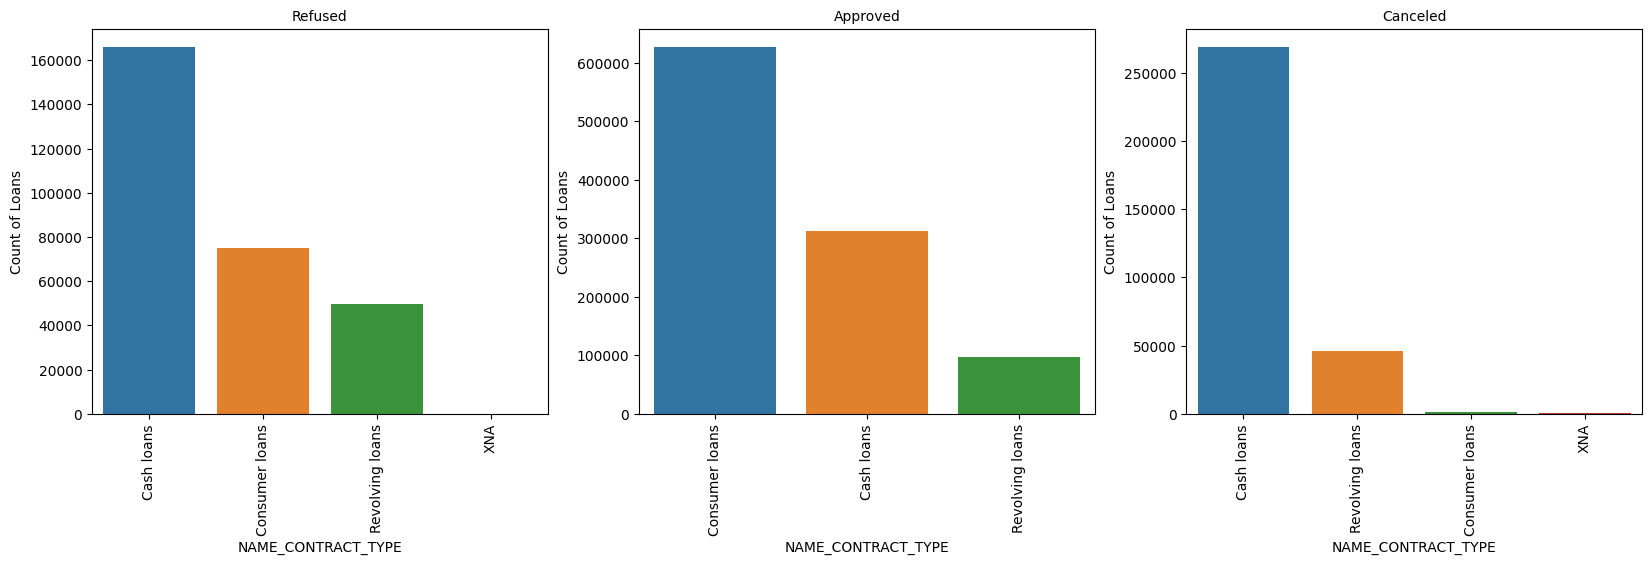

In [ ]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

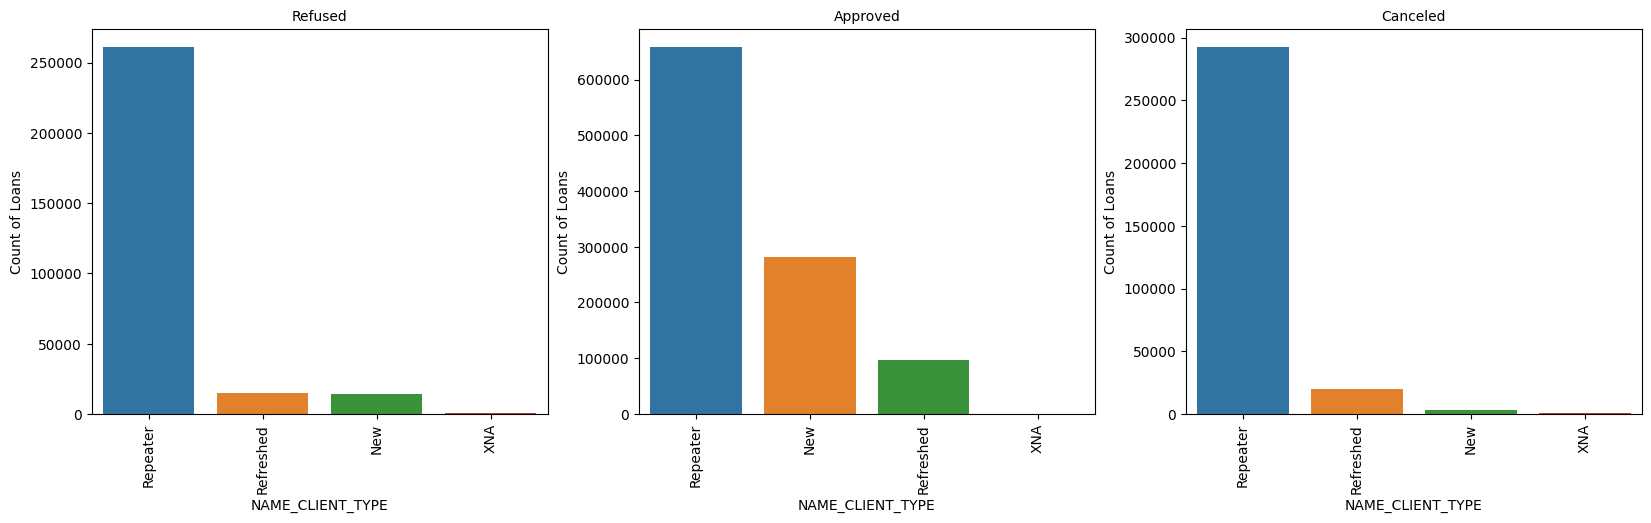

In [ ]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

In [15]:
## BIVARIATE ANALYSIS OF VARIABLES
cols_approved=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]

In [16]:
cols_refused=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]

In [ ]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

In [17]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.503,-0.031,-0.031,-0.001,-0.014,-0.002,0.459,0.258,0.006,0.267,-0.024,0.459
RATE_DOWN_PAYMENT,0.503,1.000,-0.145,-0.148,-0.011,-0.039,-0.008,-0.089,-0.105,-0.288,-0.217,-0.205,-0.089
DAYS_TERMINATION,-0.031,-0.145,1.000,0.928,0.493,0.324,-0.396,0.209,0.068,0.055,0.214,0.400,0.149
DAYS_LAST_DUE,-0.031,-0.148,0.928,1.000,0.423,0.402,-0.257,0.212,0.083,0.089,0.225,0.449,0.173
DAYS_LAST_DUE_1ST_VERSION,-0.001,-0.011,0.493,0.423,1.000,0.514,-0.803,0.017,-0.069,-0.381,0.044,0.089,-0.085
DAYS_FIRST_DUE,-0.014,-0.039,0.324,0.402,0.514,1.000,0.005,-0.021,-0.053,-0.205,0.003,0.177,-0.050
DAYS_FIRST_DRAWING,-0.002,-0.008,-0.396,-0.257,-0.803,0.005,1.000,-0.024,0.053,0.310,-0.037,-0.012,0.075
AMT_GOODS_PRICE,0.459,-0.089,0.209,0.212,0.017,-0.021,-0.024,1.000,0.831,0.636,0.993,0.255,1.000
AMT_ANNUITY,0.258,-0.105,0.068,0.083,-0.069,-0.053,0.053,0.831,1.000,0.344,0.826,0.255,0.814
CNT_PAYMENT,0.006,-0.288,0.055,0.089,-0.381,-0.205,0.310,0.636,0.344,1.000,0.626,0.189,0.646


In [18]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_DOWN_PAYMENT  AMT_DOWN_PAYMENT    1.000000
AMT_GOODS_PRICE   AMT_CREDIT          0.993244
AMT_APPLICATION   AMT_CREDIT          0.961757
DAYS_LAST_DUE     DAYS_TERMINATION    0.927990
AMT_GOODS_PRICE   AMT_ANNUITY         0.830859
AMT_CREDIT        AMT_ANNUITY         0.826005
AMT_APPLICATION   AMT_ANNUITY         0.814343
                  CNT_PAYMENT         0.645581
AMT_GOODS_PRICE   CNT_PAYMENT         0.635505
CNT_PAYMENT       AMT_CREDIT          0.626292
dtype: float64

In [19]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_TERMINATION           RATE_DOWN_PAYMENT           -0.145461
RATE_DOWN_PAYMENT          DAYS_LAST_DUE               -0.147562
DAYS_FIRST_DUE             CNT_PAYMENT                 -0.204907
DAYS_DECISION              RATE_DOWN_PAYMENT           -0.205263
AMT_CREDIT                 RATE_DOWN_PAYMENT           -0.216551
DAYS_LAST_DUE              DAYS_FIRST_DRAWING          -0.257466
RATE_DOWN_PAYMENT          CNT_PAYMENT                 -0.287845
CNT_PAYMENT                DAYS_LAST_DUE_1ST_VERSION   -0.381013
DAYS_FIRST_DRAWING         DAYS_TERMINATION            -0.396284
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING          -0.803494
dtype: float64

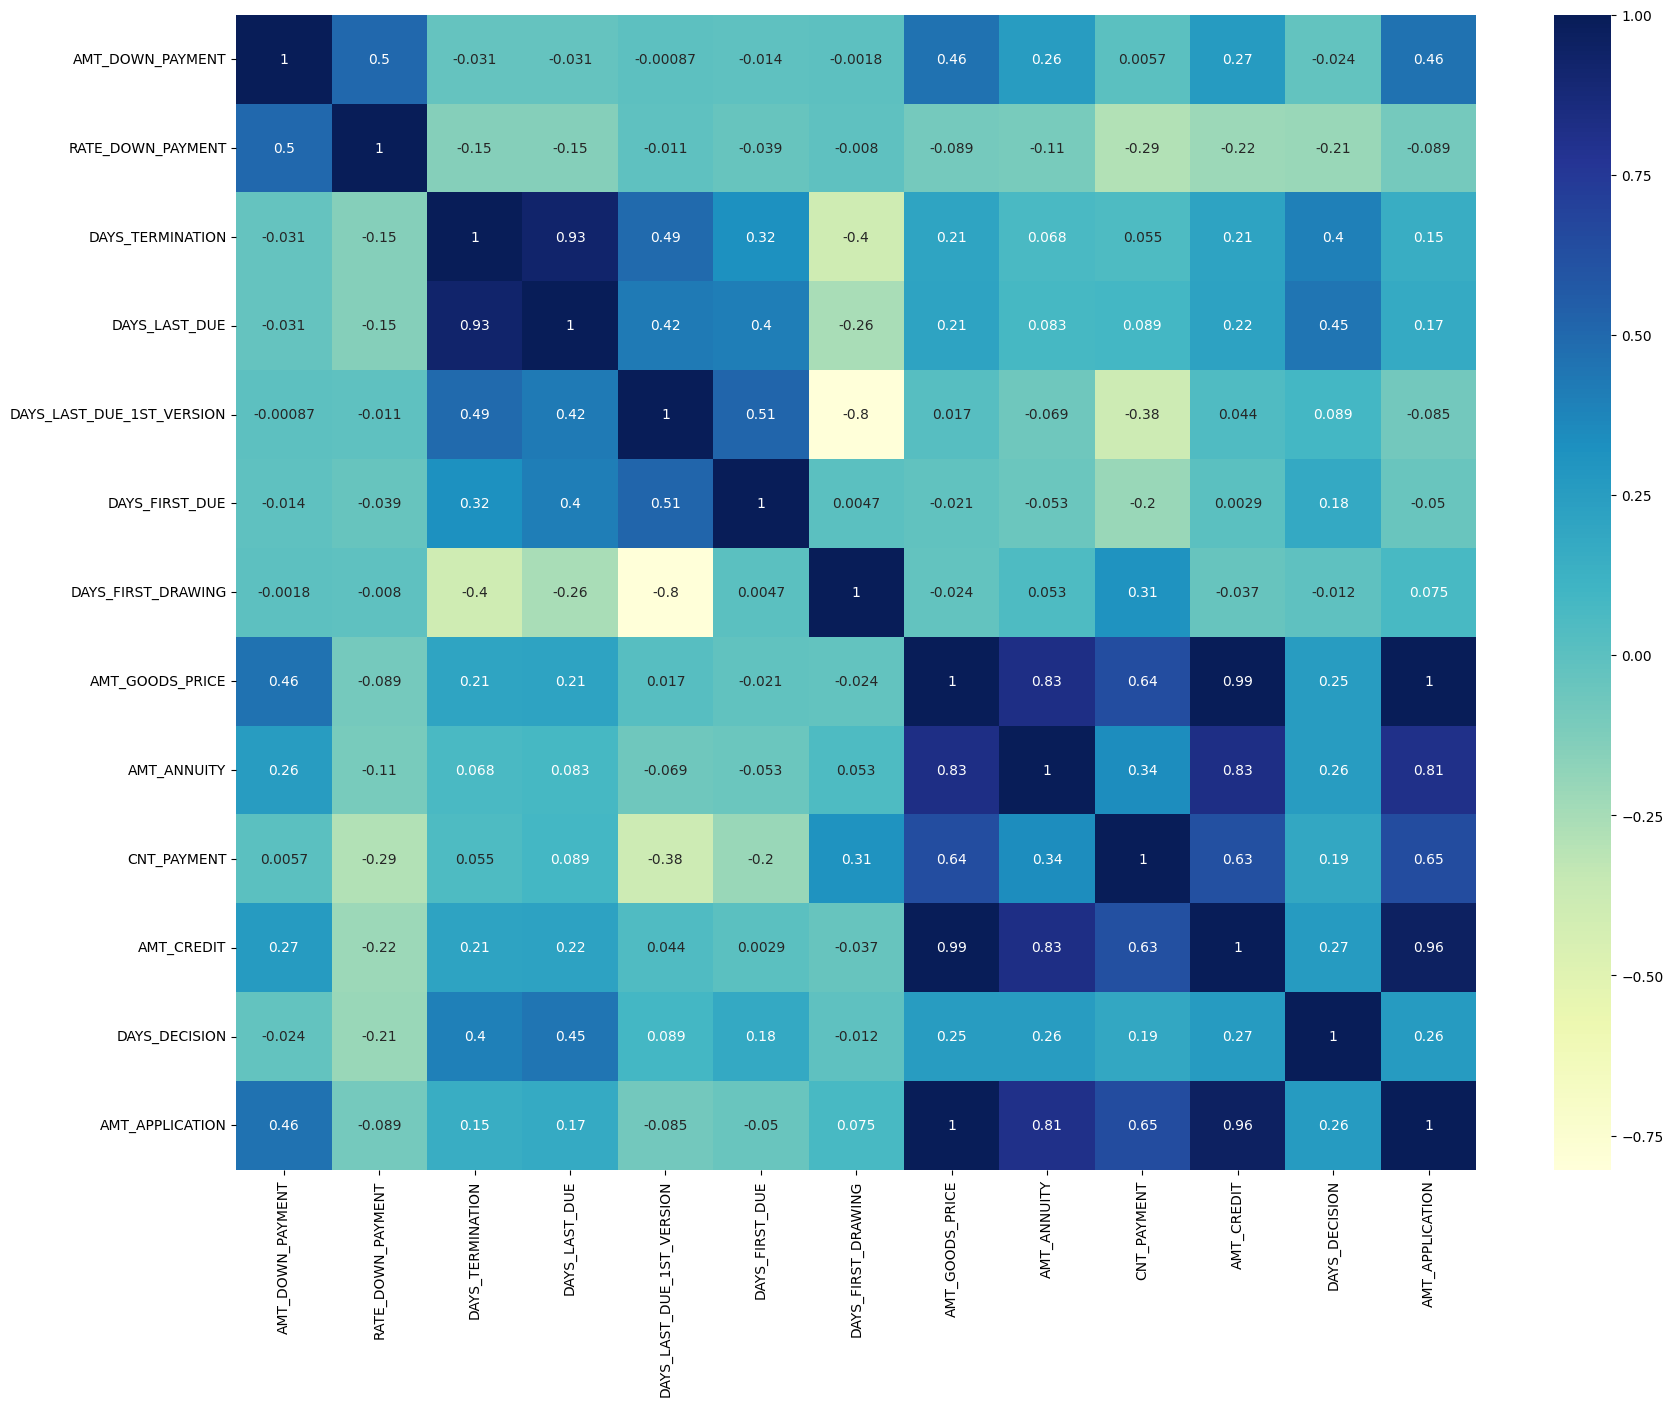

In [20]:
# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [21]:
#calculating correlation for approved
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.416,0.536,0.317,0.095,0.386,0.008,0.536
RATE_DOWN_PAYMENT,0.416,1.000,-0.024,-0.084,-0.242,-0.112,-0.225,-0.024
AMT_GOODS_PRICE,0.536,-0.024,1.000,0.823,0.658,0.992,0.334,1.000
AMT_ANNUITY,0.317,-0.084,0.823,1.000,0.427,0.820,0.287,0.818
CNT_PAYMENT,0.095,-0.242,0.658,0.427,1.000,0.677,0.306,0.670
AMT_CREDIT,0.386,-0.112,0.992,0.820,0.677,1.000,0.270,0.984
DAYS_DECISION,0.008,-0.225,0.334,0.287,0.306,0.270,1.000,0.265
AMT_APPLICATION,0.536,-0.024,1.000,0.818,0.670,0.984,0.265,1.000


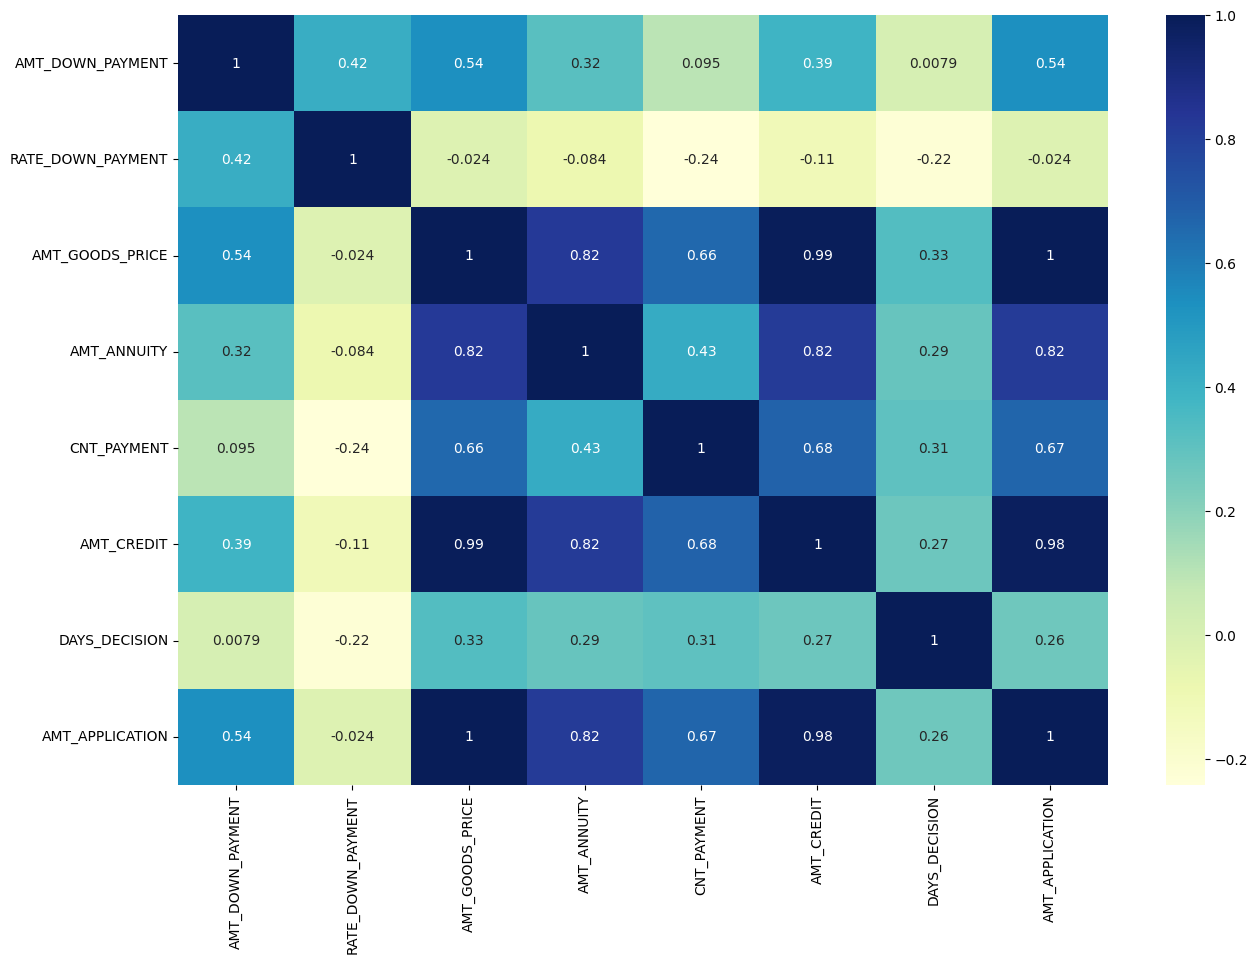

In [22]:
# figure size
plt.figure(figsize=(15,10))

# heatmap
sns.heatmap(refused_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
c2=refused_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

AMT_DOWN_PAYMENT  AMT_DOWN_PAYMENT    1.000000
AMT_GOODS_PRICE   AMT_APPLICATION     0.999699
                  AMT_CREDIT          0.991777
AMT_CREDIT        AMT_APPLICATION     0.983785
AMT_ANNUITY       AMT_GOODS_PRICE     0.822538
AMT_CREDIT        AMT_ANNUITY         0.819867
AMT_ANNUITY       AMT_APPLICATION     0.817869
CNT_PAYMENT       AMT_CREDIT          0.677433
AMT_APPLICATION   CNT_PAYMENT         0.669782
AMT_GOODS_PRICE   CNT_PAYMENT         0.658065
dtype: float64

In [ ]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_ANNUITY       DAYS_DECISION        0.286620
DAYS_DECISION     AMT_CREDIT           0.270099
                  AMT_APPLICATION      0.264581
AMT_DOWN_PAYMENT  CNT_PAYMENT          0.094697
DAYS_DECISION     AMT_DOWN_PAYMENT     0.007927
AMT_GOODS_PRICE   RATE_DOWN_PAYMENT   -0.023624
AMT_ANNUITY       RATE_DOWN_PAYMENT   -0.084484
AMT_CREDIT        RATE_DOWN_PAYMENT   -0.111684
DAYS_DECISION     RATE_DOWN_PAYMENT   -0.224665
CNT_PAYMENT       RATE_DOWN_PAYMENT   -0.242238
dtype: float64

In [ ]:
def has_terminated(x):
    if x < 0:
        return 'Loan Terminated'
    else:
        return 'Loan Open'

approved['CURRENT_STATUS'] = approved['DAYS_TERMINATION'].apply(has_terminated)

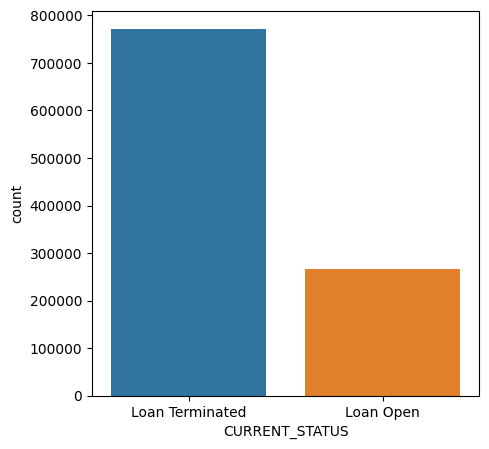

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=approved['CURRENT_STATUS'], data=approved)
plt.show()

In [ ]:
new_df= myfile_prev_application.pivot_table(values = 'NAME_CONTRACT_STATUS', index = 'SK_ID_CURR', aggfunc = 'count')
new_df=new_df.reset_index(drop=False)
new_df.rename(columns = {'NAME_CONTRACT_STATUS':'Count of Refused Loans'}, inplace = True)

In [ ]:
merged_df1=pd.merge(new_df, pd.DataFrame(myfile_application[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')

In [ ]:
merged_df1=merged_df1[merged_df1['Count of Refused Loans']!=0]
merged_df1.head()

,SK_ID_CURR,Count of Refused Loans,TARGET
0,100002,1,1
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0


In [ ]:
merged_df1[merged_df1['TARGET']==0].head()

,SK_ID_CURR,Count of Refused Loans,TARGET
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0
5,100008,5,0


In [ ]:
## Driver Variable
## AMT_ANNUITY